In [1]:
# read input data, which is a txt file
# each line is a tweet string, which is a json string
# I want to read the data into a pandas dataframe with json keys as columns

data_path = 'data/tweets_#superbowl.txt'

import pandas as pd
import json

# read the data into a list
data = []
with open(data_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))


In [2]:
# convert the list into a pandas dataframe
df = pd.DataFrame(data)
df.head()

,firstpost_date,title,url,tweet,author,original_author,citation_date,metrics,highlight,type,citation_url
0,1419883838,At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,http://twitter.com/HawksNationYes/status/54965...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421468497,"{'acceleration': 0, 'ranking_score': 3.2292066...",At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,retweet:native,http://twitter.com/BeccaDelgado67/status/55630...
1,1420343180,You been 12ed pass it on #SeahawkNation #LOB #...,http://twitter.com/brygarza/status/55158539355...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421467579,"{'acceleration': 0, 'ranking_score': 4.0334744...",You been 12ed pass it on #SeahawkNation #LOB #...,retweet:native,http://twitter.com/BeccaDelgado67/status/55630...
2,1420354386,27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,http://twitter.com/gatinhodakaty02/status/5516...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://abs.twimg.com/sticky/de...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421266957,"{'acceleration': 0, 'ranking_score': 6.9444513...",27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,retweet:native,http://twitter.com/waltskelliepic/status/55545...
3,1420662396,Check out the cool event that #budlight has p...,http://twitter.com/BlinkEventsDSM/status/55292...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421261298,"{'acceleration': 0, 'ranking_score': 6.6606402...",Check out the cool event that #budlight has p...,retweet:native,http://twitter.com/EventMarketer/status/555436...
4,1420998900,Lenny Kravitz acompañará a Katy Perry en el #H...,http://twitter.com/KatyCat_Prism_/status/55433...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421316031,"{'acceleration': 0, 'ranking_score': 3.8561826...",Lenny Kravitz acompañará a Katy Perry en el #H...,retweet:native,http://twitter.com/cqr111/status/5556658254543...


In [1]:
# combine the operations above into a function with parameters for the data path 

import pandas as pd
import json

def process_data(data_path):
    # read input data, which is a txt file
    # each line is a tweet string, which is a json string
    # I want to read the data into a pandas dataframe with json keys as columns

    data = []
    with open(data_path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            data.append(json.loads(line))

    df = pd.DataFrame(data)
    # df.head()
    # convert firstpost_data and citation_date from unix timestamp to datetime 
    df['firstpost_date'] = pd.to_datetime(df['firstpost_date'], unit='s')
    df['citation_date'] = pd.to_datetime(df['citation_date'], unit='s')


    # for 'tweet', 'author', 'original_author' and 'metrics', they are nested json objects
    # I will extract the keys of these objects as columns

    # extract the keys of 'tweet' object, asume all tweets have the same keys
    tweet_keys = df['tweet'][0].keys()
    for key in tweet_keys:
        df['tweet_'+key] = df['tweet'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'author' object, asume all tweets have the same keys
    author_keys = df['author'][0].keys()
    for key in author_keys:
        df['author_'+key] = df['author'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'original_author' object, asume all tweets have the same keys
    original_author_keys = df['original_author'][0].keys()
    for key in original_author_keys:
        df['original_author_'+key] = df['original_author'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'metrics' object, asume all tweets have the same keys
    metrics_keys = df['metrics'][0].keys()
    for key in metrics_keys:
        df['metrics_'+key] = df['metrics'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'metrics_citations' object, assume all tweets have the same keys
    metrics_citations_keys = df['metrics_citations'][0].keys()
    for key in metrics_citations_keys:
        df['metrics_citations_'+key] = df['metrics_citations'].apply(lambda x: x[key] if key in x else None)


    return df

In [2]:
# combine the calculations above into a function with df as parameter
import matplotlib.pyplot as plt

def calculate_statistics(df):
    # calculate average number of tweets per hour
    df['hour'] = df['firstpost_date'].dt.hour
    df['date'] = df['firstpost_date'].dt.date
    df['hourly_count'] = df.groupby(['date', 'hour'])['tweet_id'].transform('count')
    print('Average number of tweets per hour: ', df['hourly_count'].mean())

    # Average number of followers of users posting the tweets per tweet.
    # To make it simple we average over the number of tweets; 
    # if a users posted twice, we count the user and the user’s followers twice as well)
    df['author_followers'] = df['author_followers'].fillna(0)
    df['author_followers'] = df['author_followers'].astype(int)
    print('Average number of followers of users posting the tweets per tweet: ', df['author_followers'].mean())

    # Count the average number of retweets per tweet using metrics_citations_total
    df['metrics_citations_total'] = df['metrics_citations_total'].fillna(0)
    df['metrics_citations_total'] = df['metrics_citations_total'].astype(int)
    print('Average number of retweets per tweet: ', df['metrics_citations_total'].mean())

    # Plot “number of tweets in hour” over time for  (a bar plot with 1-hour bins)
    # Create a figure with a specific size
    plt.figure(figsize=(15, 6))
    # Group by date and hour, count tweets in each group    
    # Group by date and hour, count the tweets, and reset index to create a dataframe
    hourly_tweets = df.groupby(['date', 'hour'])['tweet_id'].count().reset_index(name='count')
    
    # Create a datetime column by combining date and hour
    hourly_tweets['datetime'] = hourly_tweets.apply(lambda x: pd.Timestamp(x['date']) + pd.Timedelta(hours=x['hour']), axis=1)
    
    # Sort by datetime
    hourly_tweets = hourly_tweets.sort_values('datetime')
    
    # Plot the bar chart
    plt.bar(hourly_tweets['datetime'], hourly_tweets['count'], width=0.03)
    
    # Add labels and title
    plt.xlabel('Date and Hour')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets per Hour Over Time')
    
    # Format x-axis to show dates nicely
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

    return df


Processing file:  tweets_#nfl.txt
Average number of tweets per hour:  1978.763670383054
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254


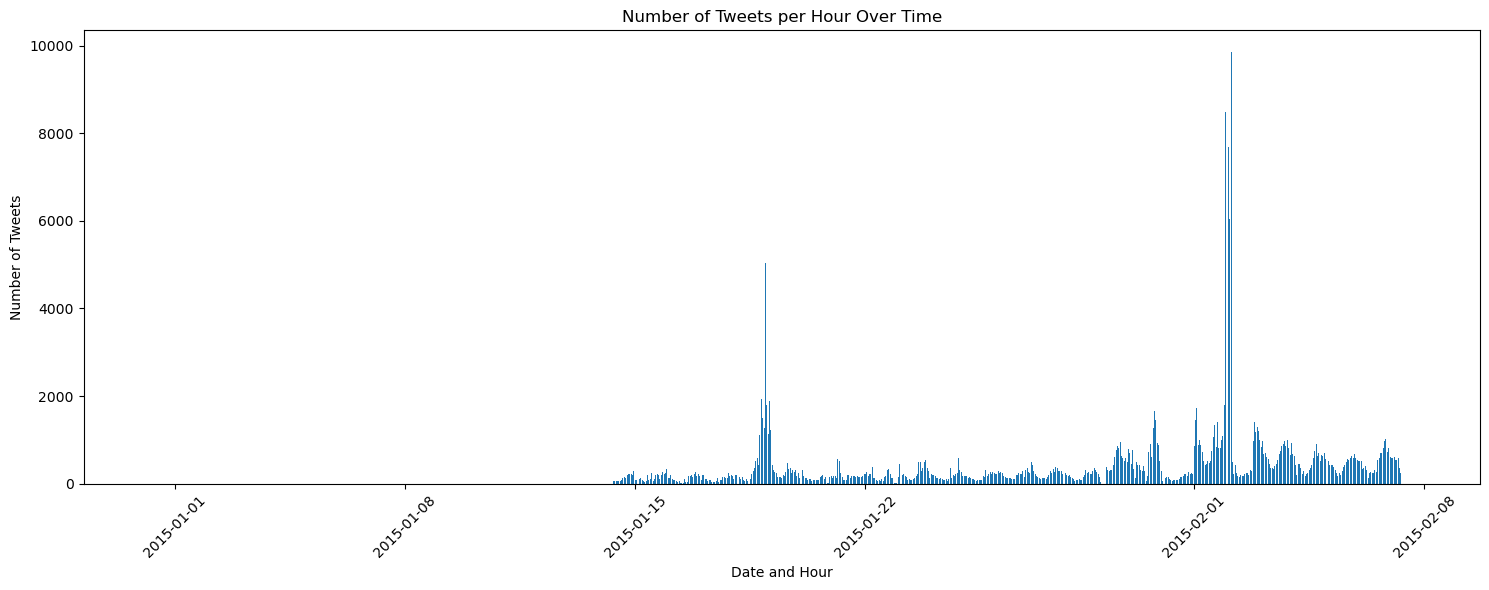

Processing file:  tweets_#superbowl.txt
Average number of tweets per hour:  127827.87722079101
Average number of followers of users posting the tweets per tweet:  8814.96799424623
Average number of retweets per tweet:  2.3911895819207736


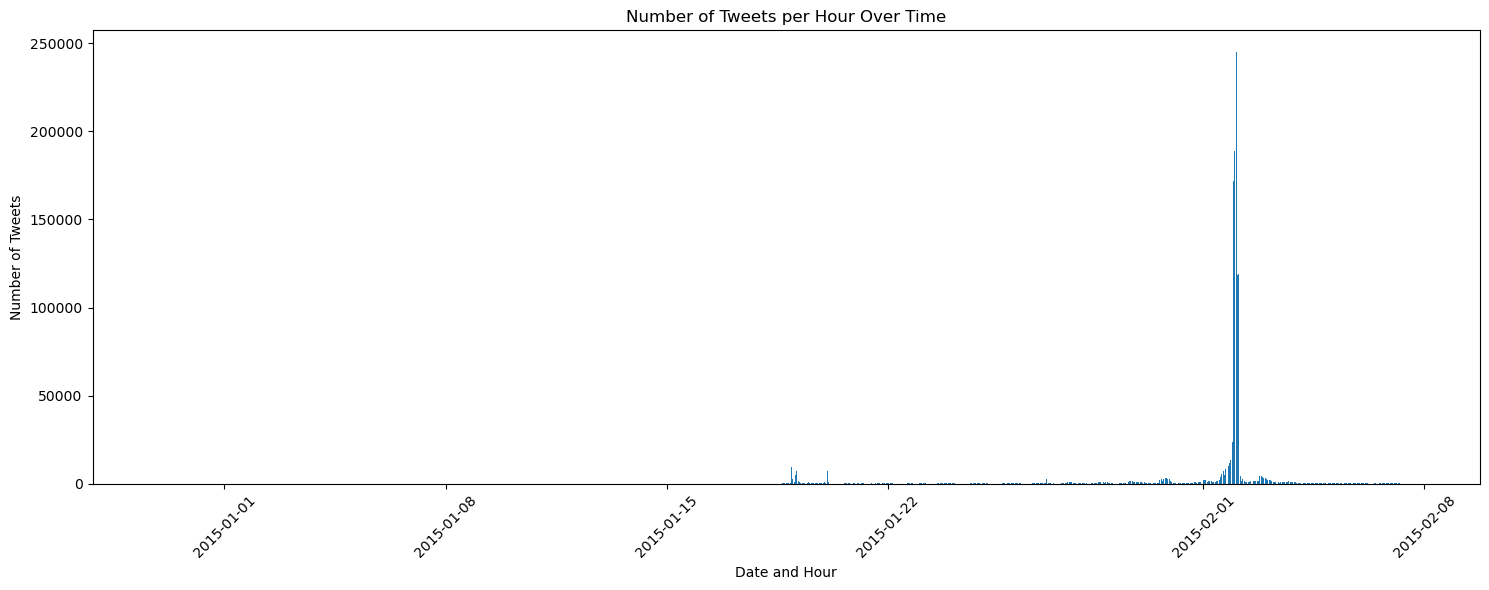

Processing file:  tweets_#sb49.txt
Average number of tweets per hour:  66125.1947962009
Average number of followers of users posting the tweets per tweet:  10374.160292019487
Average number of retweets per tweet:  2.52713444111402


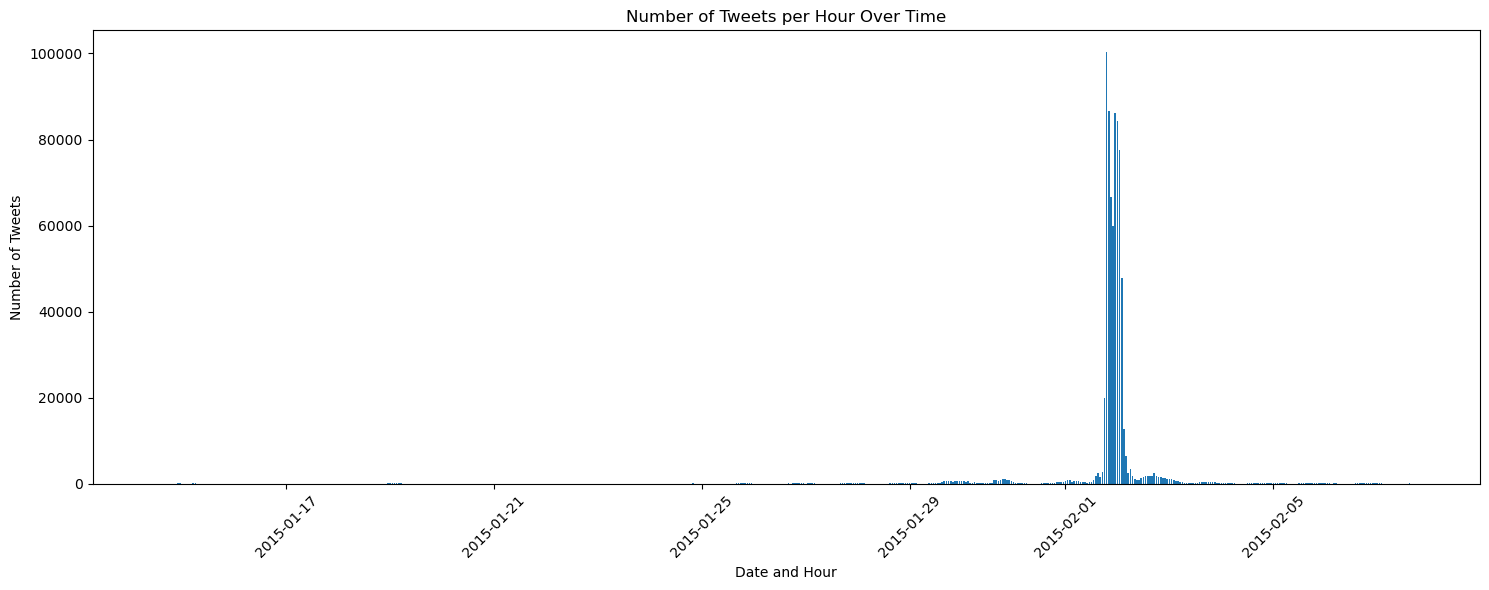

Processing file:  tweets_#patriots.txt
Average number of tweets per hour:  21695.875963696693
Average number of followers of users posting the tweets per tweet:  3280.4635616550277
Average number of retweets per tweet:  1.7852871288476946


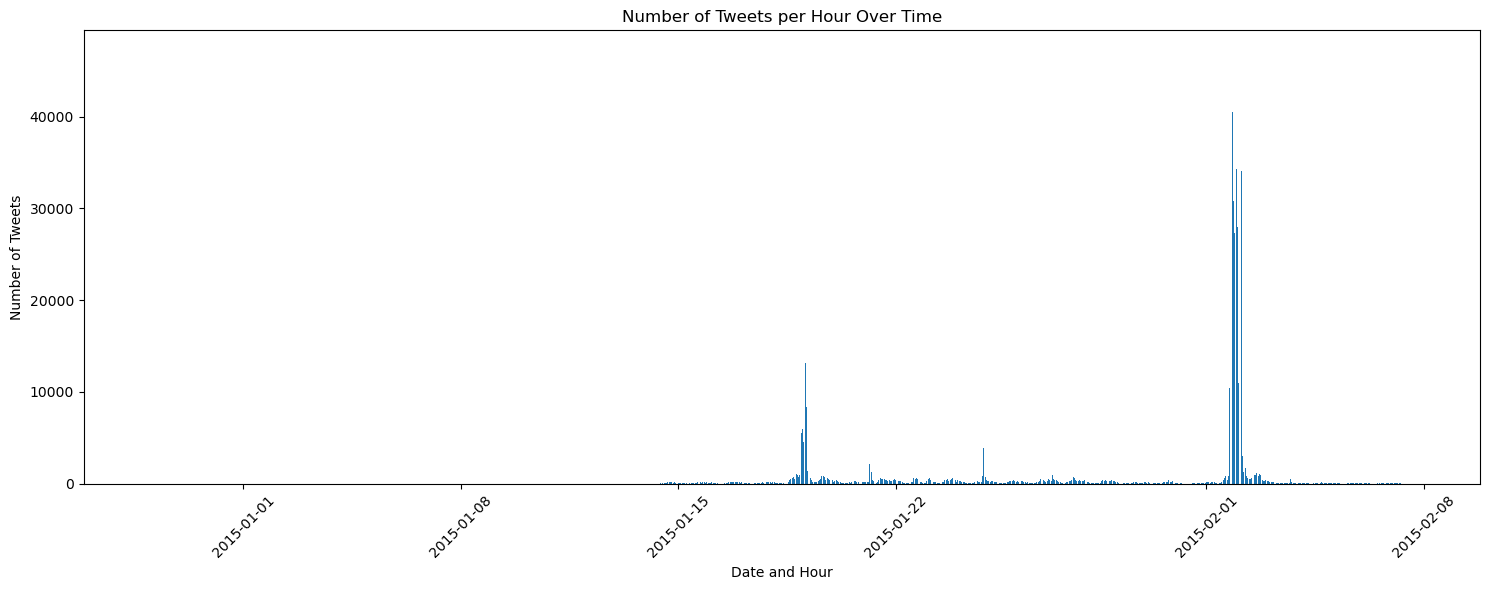

Processing file:  tweets_#gohawks.txt
Average number of tweets per hour:  5249.860313856269
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877


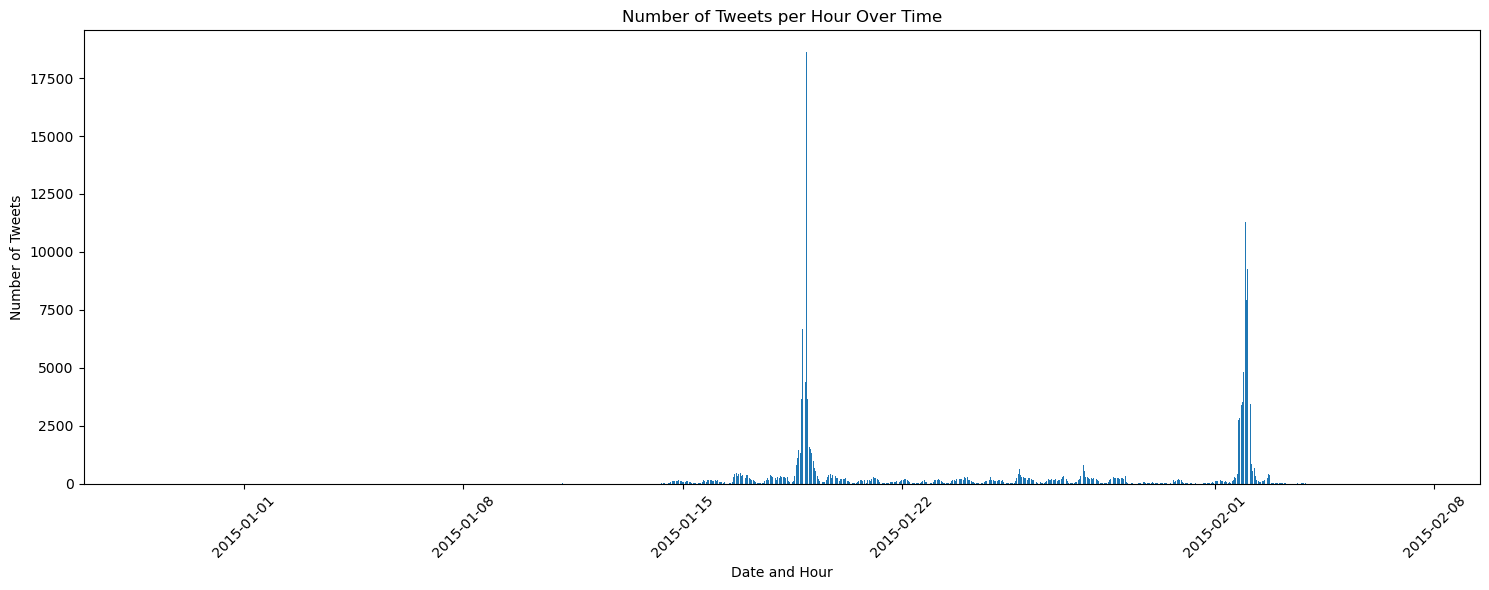

Processing file:  tweets_#gopatriots.txt
Average number of tweets per hour:  1869.8754200161627
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078


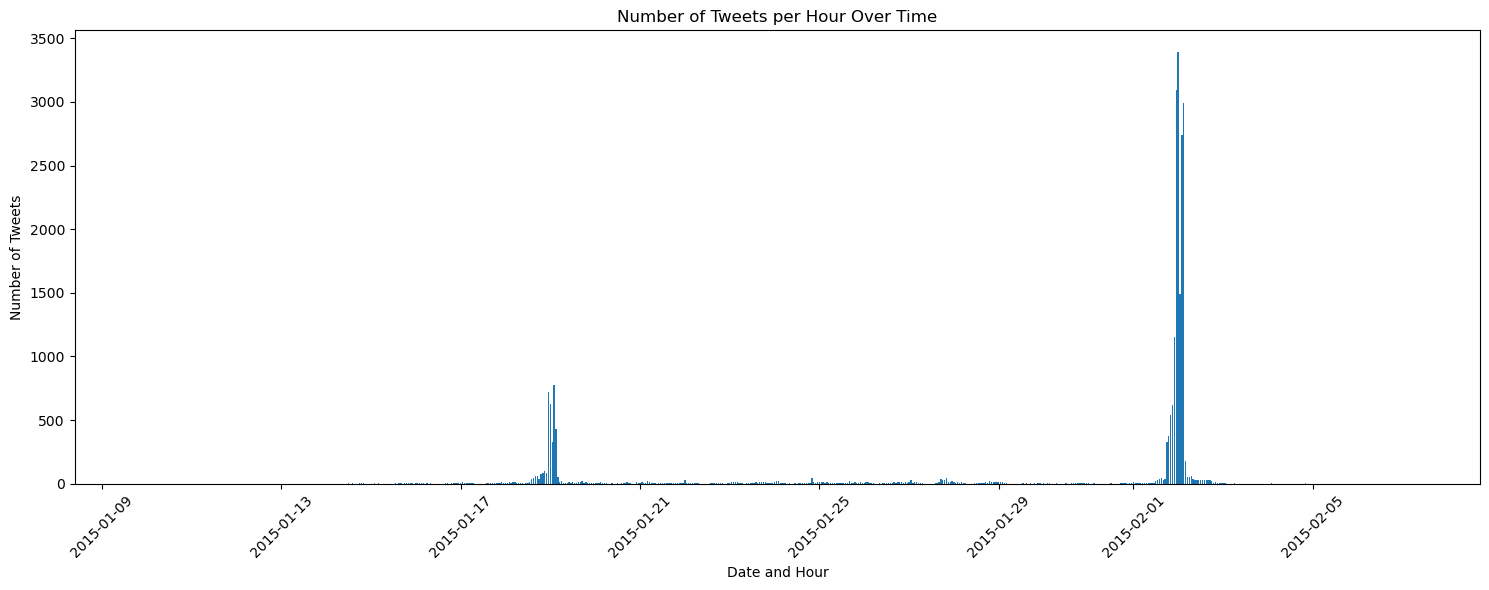

In [8]:
# call process_data and calculate_statistics with each txt file in the data folder
import os
for file in os.listdir('data'):
    if file.endswith('.txt'):
        print('Processing file: ', file)
        df = process_data('data/'+file)
        df = calculate_statistics(df)


## Logistic Regression for #superbowl

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [4]:
input_file = "data/tweets_#superbowl.txt"
output_file = "data/tweets_#superbowl_subset.txt"

with open(input_file, "r", encoding="utf-8") as f_in, open(output_file, "w", encoding="utf-8") as f_out:
    for i, line in enumerate(f_in):
        if i >= 120000:
            break
        f_out.write(line)

Average number of tweets per hour:  2284.6959333333334
Average number of followers of users posting the tweets per tweet:  12118.98835
Average number of retweets per tweet:  2.187683333333333


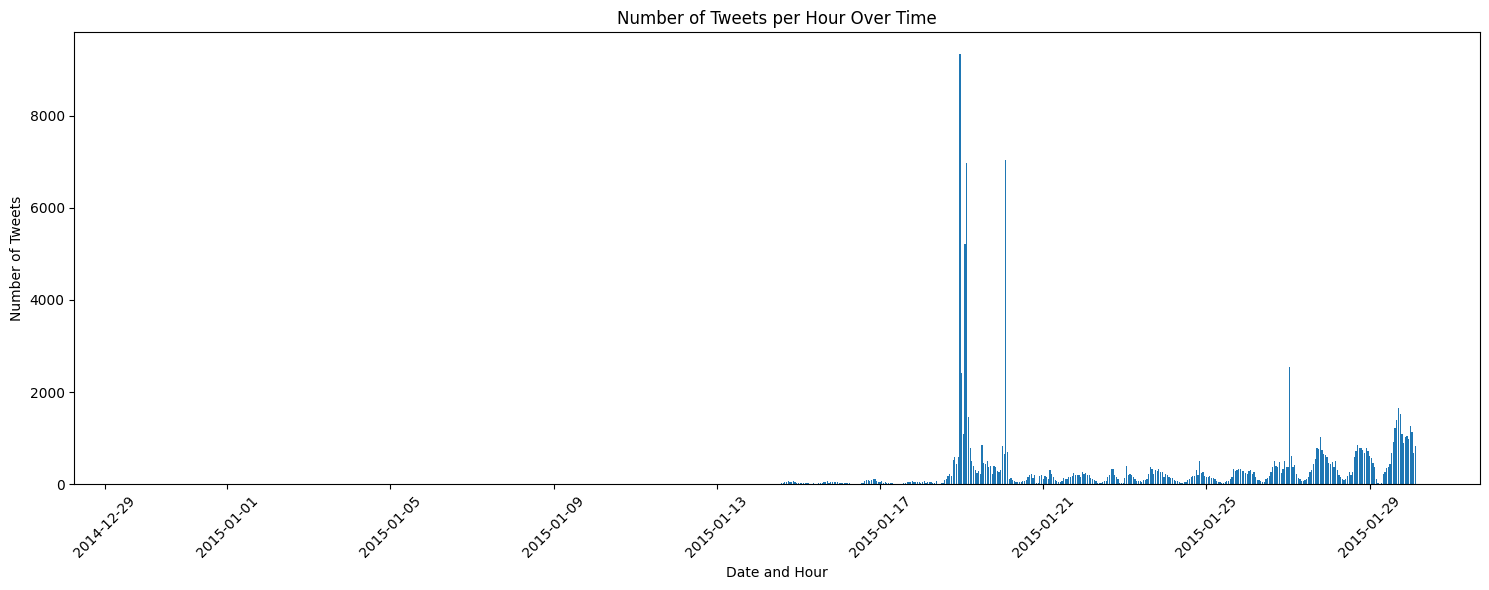

In [5]:
df_sample = process_data("data/tweets_#superbowl_subset.txt")
df_sample = calculate_statistics(df_sample)

In [6]:
df_sample.head()

,firstpost_date,title,url,tweet,author,original_author,citation_date,metrics,highlight,type,...,metrics_impressions,metrics_momentum,metrics_citations_influential,metrics_citations_total,metrics_citations_data,metrics_citations_matching,metrics_citations_replies,hour,date,hourly_count
0,2014-12-29 20:10:38,At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,http://twitter.com/HawksNationYes/status/54965...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,2015-01-17 04:21:37,"{'acceleration': 0, 'ranking_score': 3.2292066...",At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,retweet:native,...,5,0,0,2,"[{'timestamp': 1421468459, 'citations': 0}]",1,0,20,2014-12-29,1
1,2015-01-04 03:46:20,You been 12ed pass it on #SeahawkNation #LOB #...,http://twitter.com/brygarza/status/55158539355...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,2015-01-17 04:06:19,"{'acceleration': 0, 'ranking_score': 4.0334744...",You been 12ed pass it on #SeahawkNation #LOB #...,retweet:native,...,4,1,0,15,"[{'timestamp': 1421467559, 'citations': 1}]",1,0,3,2015-01-04,1
2,2015-01-04 06:53:06,27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,http://twitter.com/gatinhodakaty02/status/5516...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://abs.twimg.com/sticky/de...,{'author_img': 'http://pbs.twimg.com/profile_i...,2015-01-14 20:22:37,"{'acceleration': 0, 'ranking_score': 6.9444513...",27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,retweet:native,...,833,0,1,2,"[{'timestamp': 1421266919, 'citations': 0}]",1,0,6,2015-01-04,1
3,2015-01-07 20:26:36,Check out the cool event that #budlight has p...,http://twitter.com/BlinkEventsDSM/status/55292...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,2015-01-14 18:48:18,"{'acceleration': 0, 'ranking_score': 6.6606402...",Check out the cool event that #budlight has p...,retweet:native,...,13943,0,1,2,"[{'timestamp': 1421261279, 'citations': 0}]",1,0,20,2015-01-07,1
4,2015-01-11 17:55:00,Lenny Kravitz acompañará a Katy Perry en el #H...,http://twitter.com/KatyCat_Prism_/status/55433...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,2015-01-15 10:00:31,"{'acceleration': 0, 'ranking_score': 3.8561826...",Lenny Kravitz acompañará a Katy Perry en el #H...,retweet:native,...,1101,1,0,7,"[{'timestamp': 1421315999, 'citations': 1}]",1,0,17,2015-01-11,1


In [7]:
df_sample['tweet_retweet_count'].mean()

0.0746

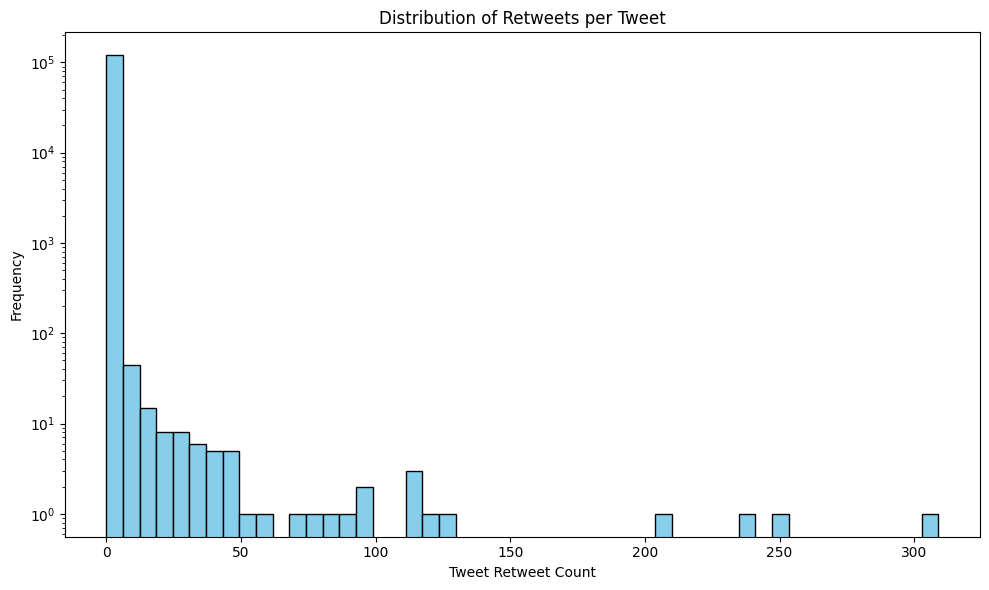

In [8]:
# ----- Histogram -----
plt.figure(figsize=(10, 6))
plt.hist(df_sample['tweet_retweet_count'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Retweets per Tweet")
plt.xlabel("Tweet Retweet Count")
plt.ylabel("Frequency")
plt.yscale("log")  # Use log scale for the y-axis due to heavy-tail distribution
plt.tight_layout()
plt.show()

In [9]:
# We select existing numeric features (excluding tweet_retweet_count) and the engineered features.
features = [
    'tweet_favorite_count',
    'author_followers',
    'metrics_ranking_score',
    'metrics_impressions',
    'metrics_momentum',
    'metrics_citations_influential',
    'metrics_citations_total',
    'metrics_citations_matching',
    'metrics_citations_replies'
]

text_features = [
    'highlight',
    'title'
]


# Drop rows with missing values in the selected features or target
df_sample = df_sample.dropna(subset=features + ['tweet_retweet_count'])
print("Number of rows after dropping missing values:", len(df_sample))

Number of rows after dropping missing values: 120000


### Using TF-IDF to encode text features

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8)
tf_idf_highlight = vectorizer.fit_transform(df_sample['highlight'].fillna(""))
tf_idf_title = vectorizer.fit_transform(df_sample['title'].fillna(""))

In [11]:
df_sample_selected = df_sample[features+['tweet_retweet_count']]
df_sample_selected.head()

,tweet_favorite_count,author_followers,metrics_ranking_score,metrics_impressions,metrics_momentum,metrics_citations_influential,metrics_citations_total,metrics_citations_matching,metrics_citations_replies,tweet_retweet_count
0,0,22,3.229207,5,0,0,2,1,0,0
1,0,22,4.033474,4,1,0,15,1,0,0
2,0,858,6.944451,833,0,1,2,1,0,0
3,0,14335,6.660640,13943,0,1,2,1,0,1
4,0,1143,3.856183,1101,1,0,7,1,0,0


### From the Pearson Correlation Matrix of the selected features, we only see that the tweet_favorite_count has a significance relationship with the tweet_retweet_count feature.

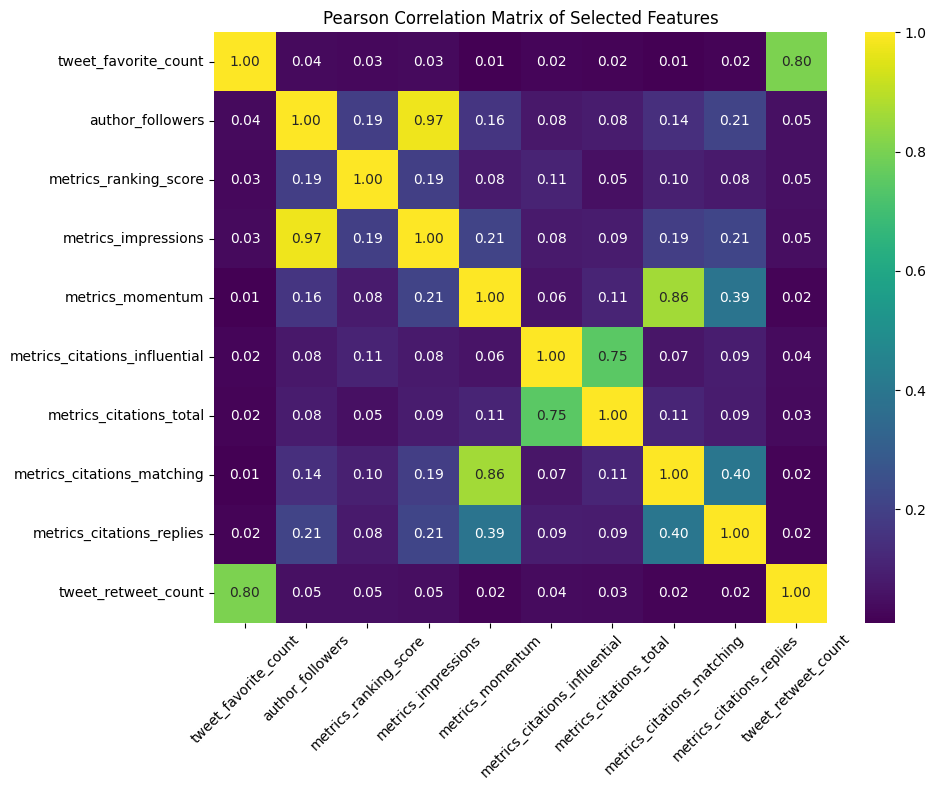

In [12]:
pearson_corr = df_sample_selected.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='viridis')
plt.title("Pearson Correlation Matrix of Selected Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

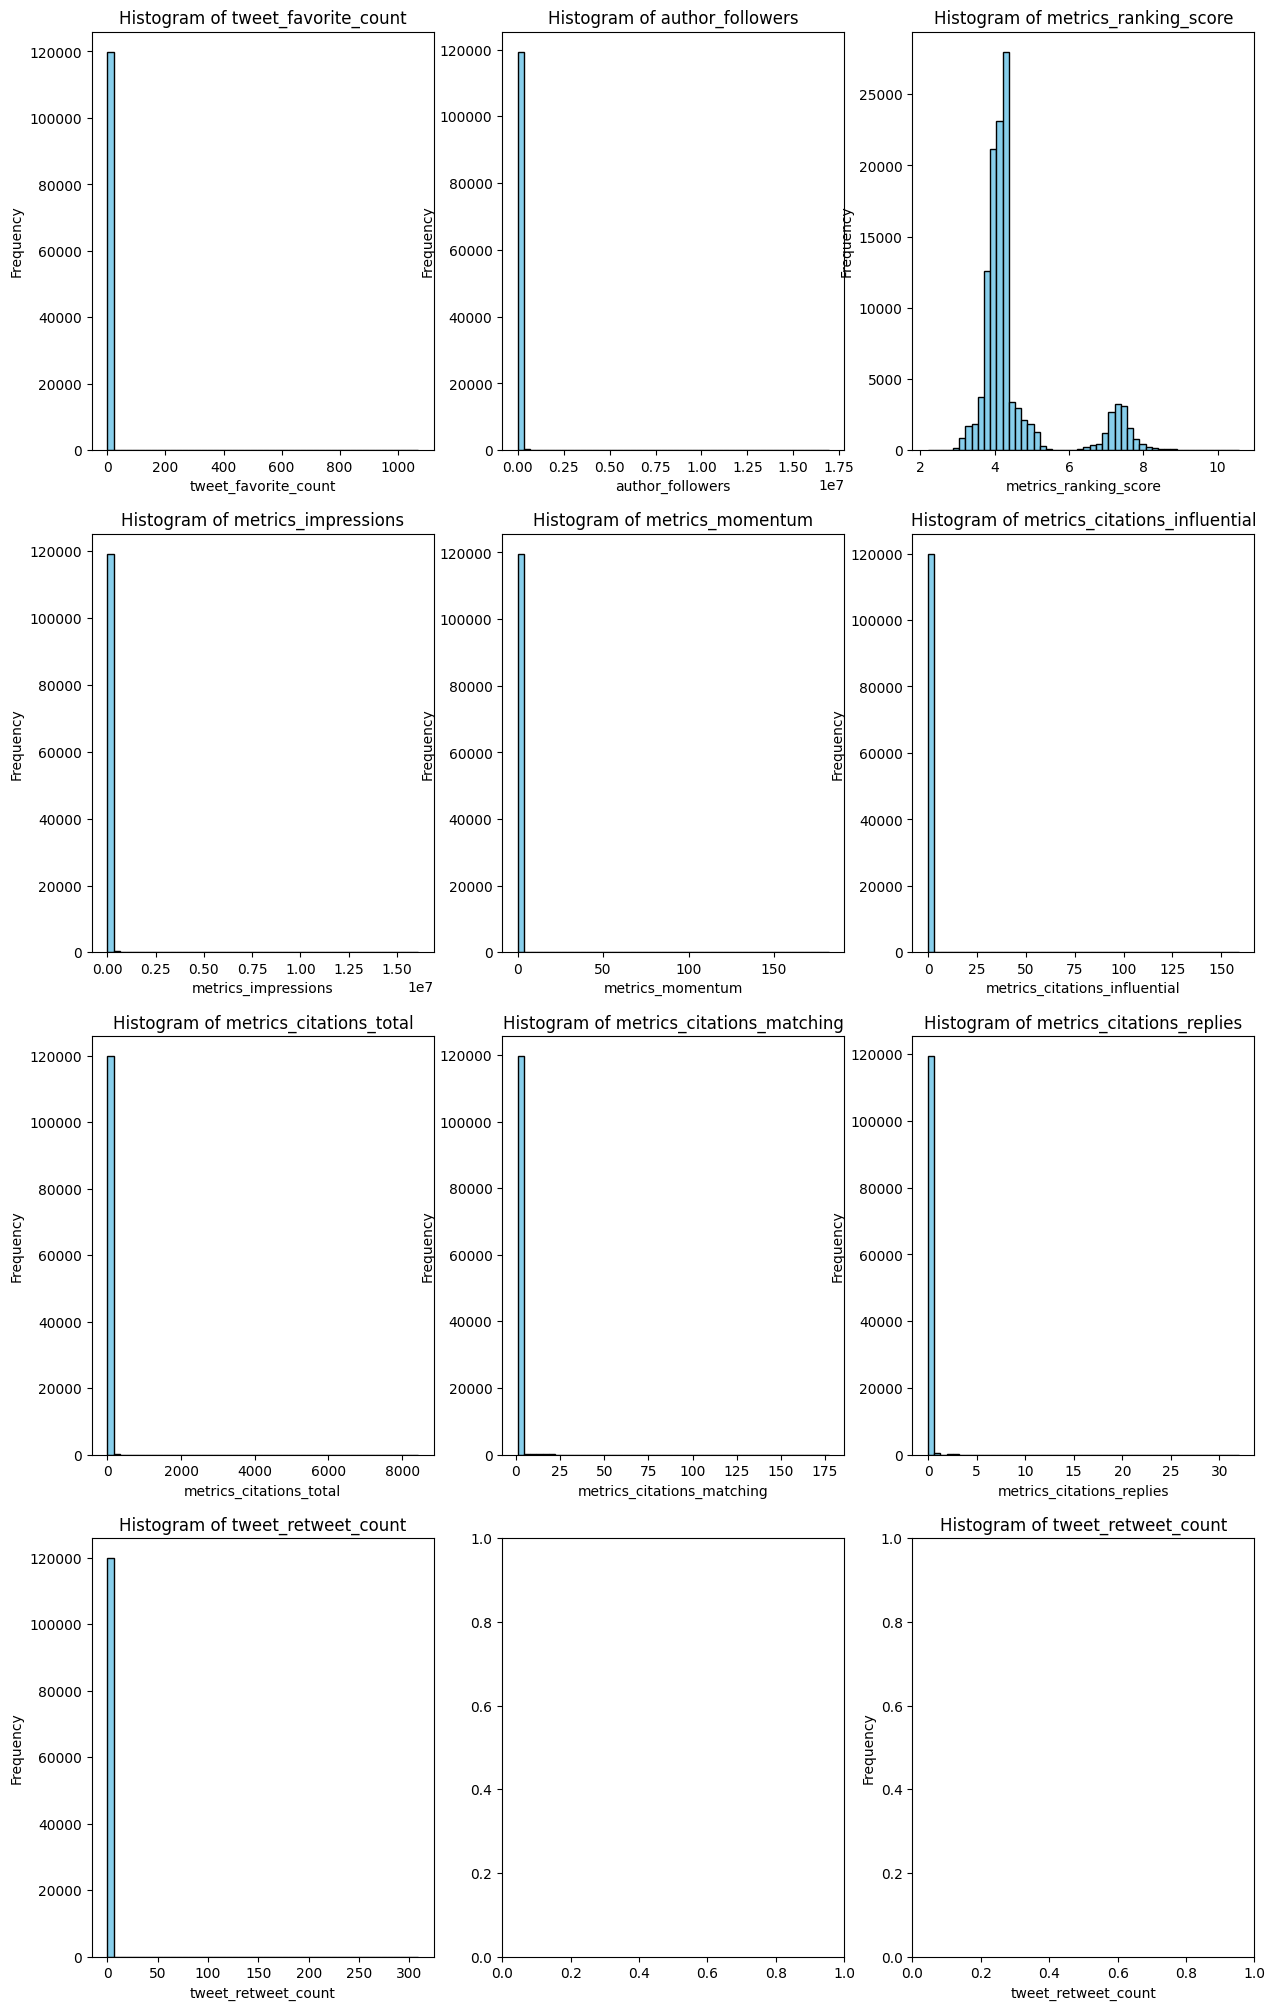

In [13]:
# plot the histogram of numerical features, put them in a grid of 3x3
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
axes = axes.ravel()

for i, feature in enumerate(df_sample_selected.columns):
    axes[i].hist(df_sample_selected[feature], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")

## Transform the data using log(1+p)

/var/folders/wc/v051_yg966q2hwp1kh9kz4d80000gn/T/ipykernel_46052/2125366755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_selected[col] = np.log1p(df_sample_selected[col].clip(lower=0))
/var/folders/wc/v051_yg966q2hwp1kh9kz4d80000gn/T/ipykernel_46052/2125366755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_selected[col] = np.log1p(df_sample_selected[col].clip(lower=0))
/var/folders/wc/v051_yg966q2hwp1kh9kz4d80000gn/T/ipykernel_46052/2125366755.py:4: SettingWithCopyWarning: 
A

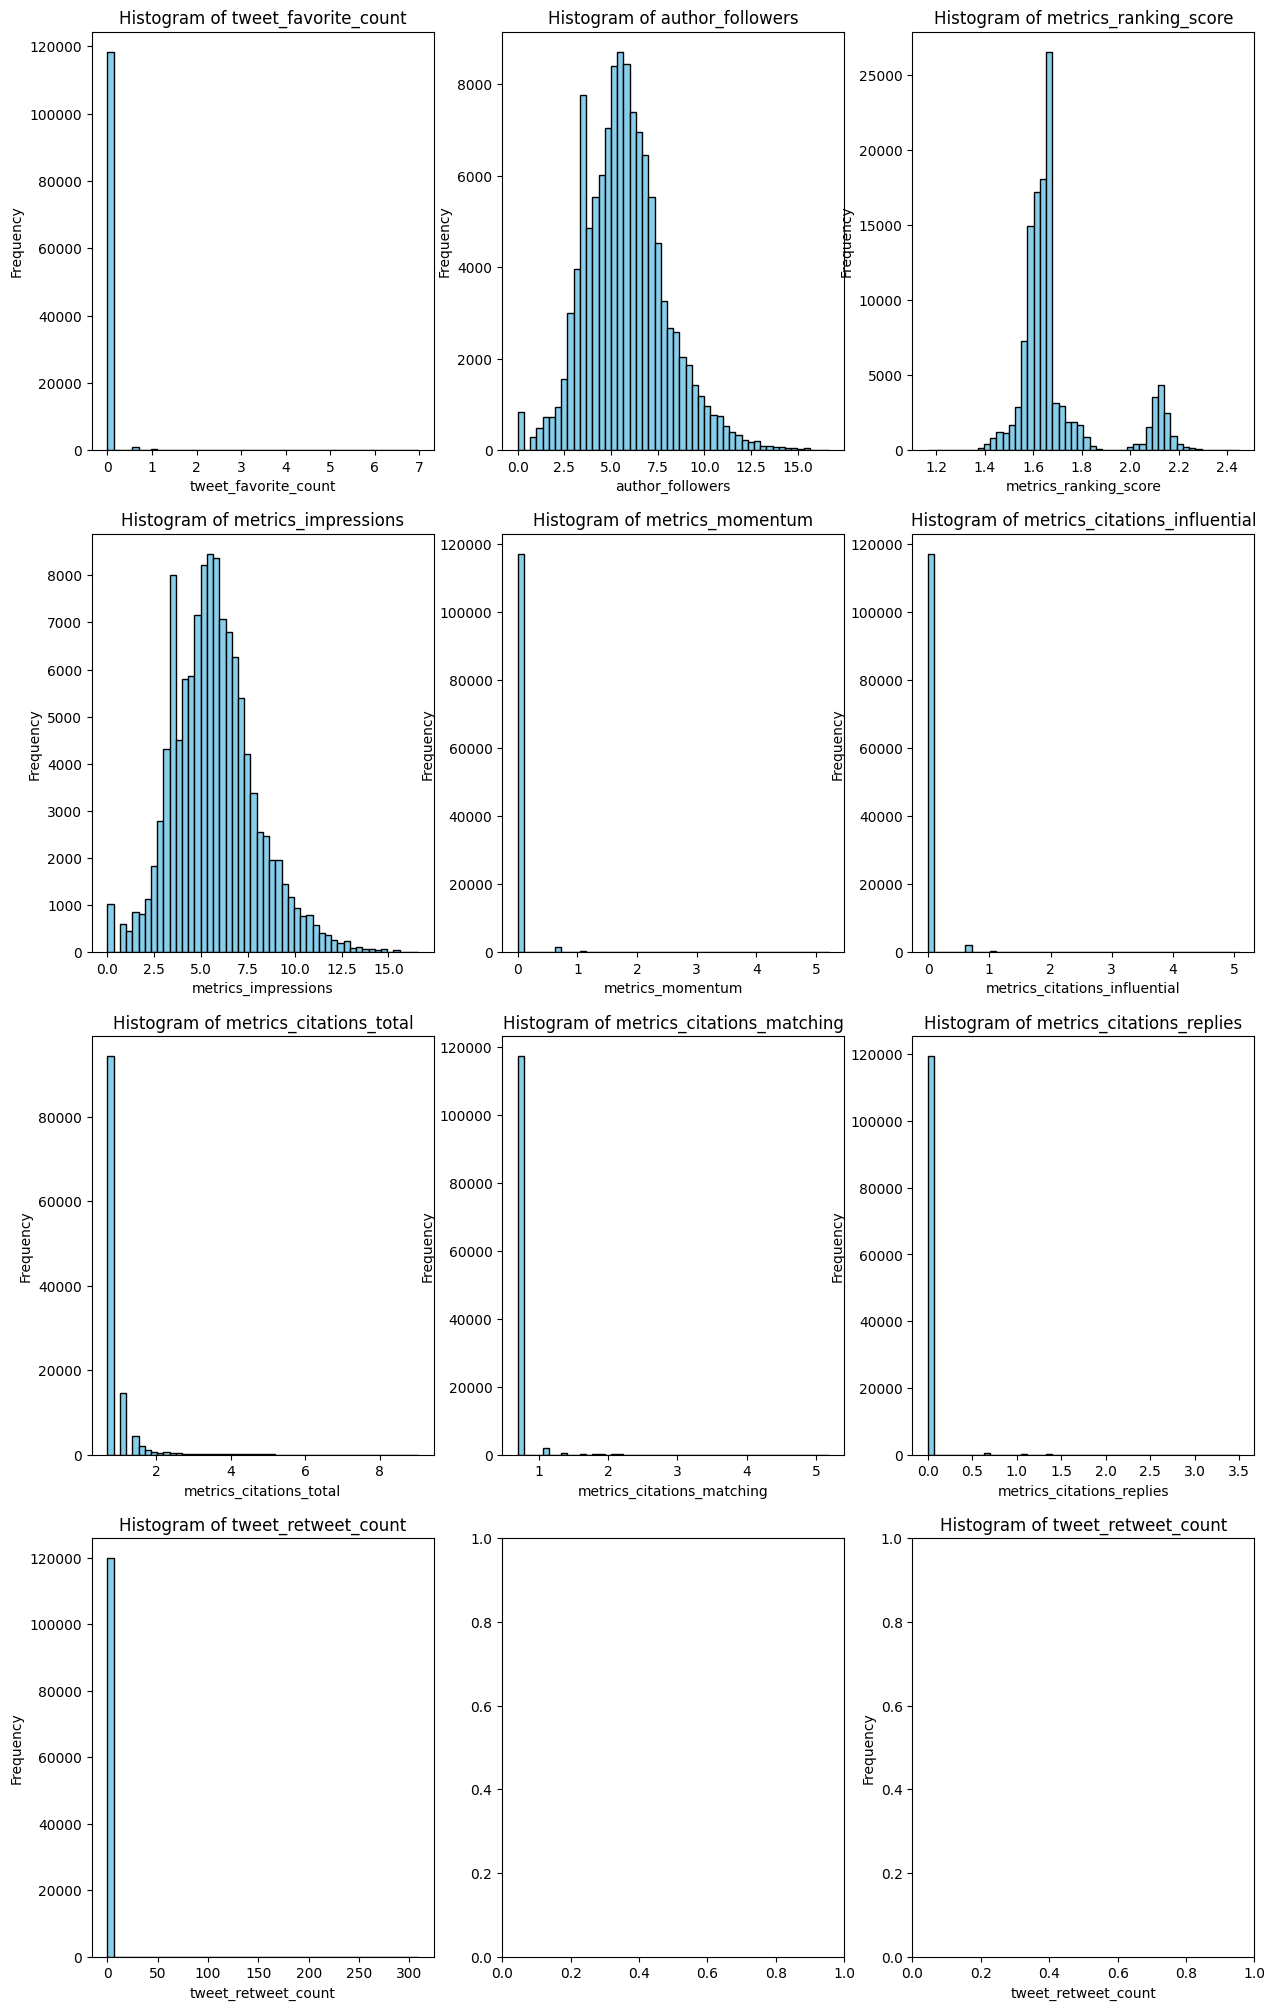

In [14]:
for col in features:
    # If the column has negative values, you might need additional handling
    # For now, we'll clip at 0 to avoid log(negative) errors:
    df_sample_selected[col] = np.log1p(df_sample_selected[col].clip(lower=0))

# plot the histogram of numerical features, put them in a grid of 4x3
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
axes = axes.ravel()

for i, feature in enumerate(df_sample_selected.columns):
    axes[i].hist(df_sample_selected[feature], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")

In [15]:
df_sample_selected.head()

,tweet_favorite_count,author_followers,metrics_ranking_score,metrics_impressions,metrics_momentum,metrics_citations_influential,metrics_citations_total,metrics_citations_matching,metrics_citations_replies,tweet_retweet_count
0,0.0,3.135494,1.442014,1.791759,0.000000,0.000000,1.098612,0.693147,0.0,0
1,0.0,3.135494,1.616110,1.609438,0.693147,0.000000,2.772589,0.693147,0.0,0
2,0.0,6.755769,2.072474,6.726233,0.000000,0.693147,1.098612,0.693147,0.0,0
3,0.0,9.570529,2.036096,9.542805,0.000000,0.693147,1.098612,0.693147,0.0,1
4,0.0,7.042286,1.580253,7.004882,0.693147,0.000000,2.079442,0.693147,0.0,0


## Preprocessing and Feature Selection

In [16]:
# ----- Preprocessing and Feature Selection -----
X = df_sample_selected.drop(columns=['tweet_retweet_count'])
y = df_sample_selected['tweet_retweet_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Select best 6 related features

In [17]:
# Apply feature selection: select the top 6 features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=6)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Display the selected feature names and their scores for insight
selected_feature_names = np.array(features)[selector.get_support()]
selected_scores = selector.scores_[selector.get_support()]
print("Selected Features and their Scores:")
for feat, score in zip(selected_feature_names, selected_scores):
    print(f"{feat}: {score}")

Selected Features and their Scores:
tweet_favorite_count: 37490.03837672691
author_followers: 362.24948631862117
metrics_ranking_score: 248.00031425022686
metrics_impressions: 361.44292424087644
metrics_citations_influential: 559.1866064417494
metrics_citations_total: 2050.4776947066707


Add text features back to df for training

In [20]:
# ----- Model Training: Logistic Regression -----
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_selected, y_train)

# ----- Evaluation: Compute RMSE on Predicted Probabilities -----
# Predict the probability for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

# Compute RMSE between the predicted probabilities and the actual binary targets
rmse = math.sqrt(mean_squared_error(y_test, y_pred_proba))
print("RMSE on test set:", rmse)

RMSE on test set: 1.6936588121309004
